In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv')
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [3]:
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [4]:
df.shape

(31647, 18)

This data set has 31647 rows and 18 columns.

In [5]:
df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [6]:
#checking the count of each unique value in columns
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

26110    1
13339    1
39681    1
15135    1
26037    1
        ..
1247     1
15584    1
25376    1
38699    1
14156    1
Name: ID, Length: 31647, dtype: int64


32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: age, Length: 76, dtype: int64


blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64


married     19095
single       8922
divorced     3630
Name: marital, dtype: int64


secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64


no     31062
yes      585
Name: default, dtype: int64


 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120       1
-713         1
-905         1
 4722  

In [7]:
df.nunique().to_frame("No. of unique values")

,No. of unique values
ID,31647
age,76
job,12
marital,3
education,4
default,2
balance,6326
housing,2
loan,2
contact,3


In [8]:
df.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

Our datset has two types of data: object type and int64 type

# Data Analysis

In [9]:
df.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


From above statistical information we can say :

1) statistical data is possible only for numerical column and not for categorical columns.
2) The mean value in all columns except day column is greater than the median which means data is skewed to the right in this column.
3) There is a huge difference in 75% and max value of these columns hence, there are outliers present in the data.

In [10]:
#separating numerical and categorical columns
numerical_col=[]
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
    else:
        numerical_col.append(i)

In [11]:
print('categorical column:',categorical_col)
print('numerical column:',numerical_col)

categorical column: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']
numerical column: ['ID', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


# Data Visualization

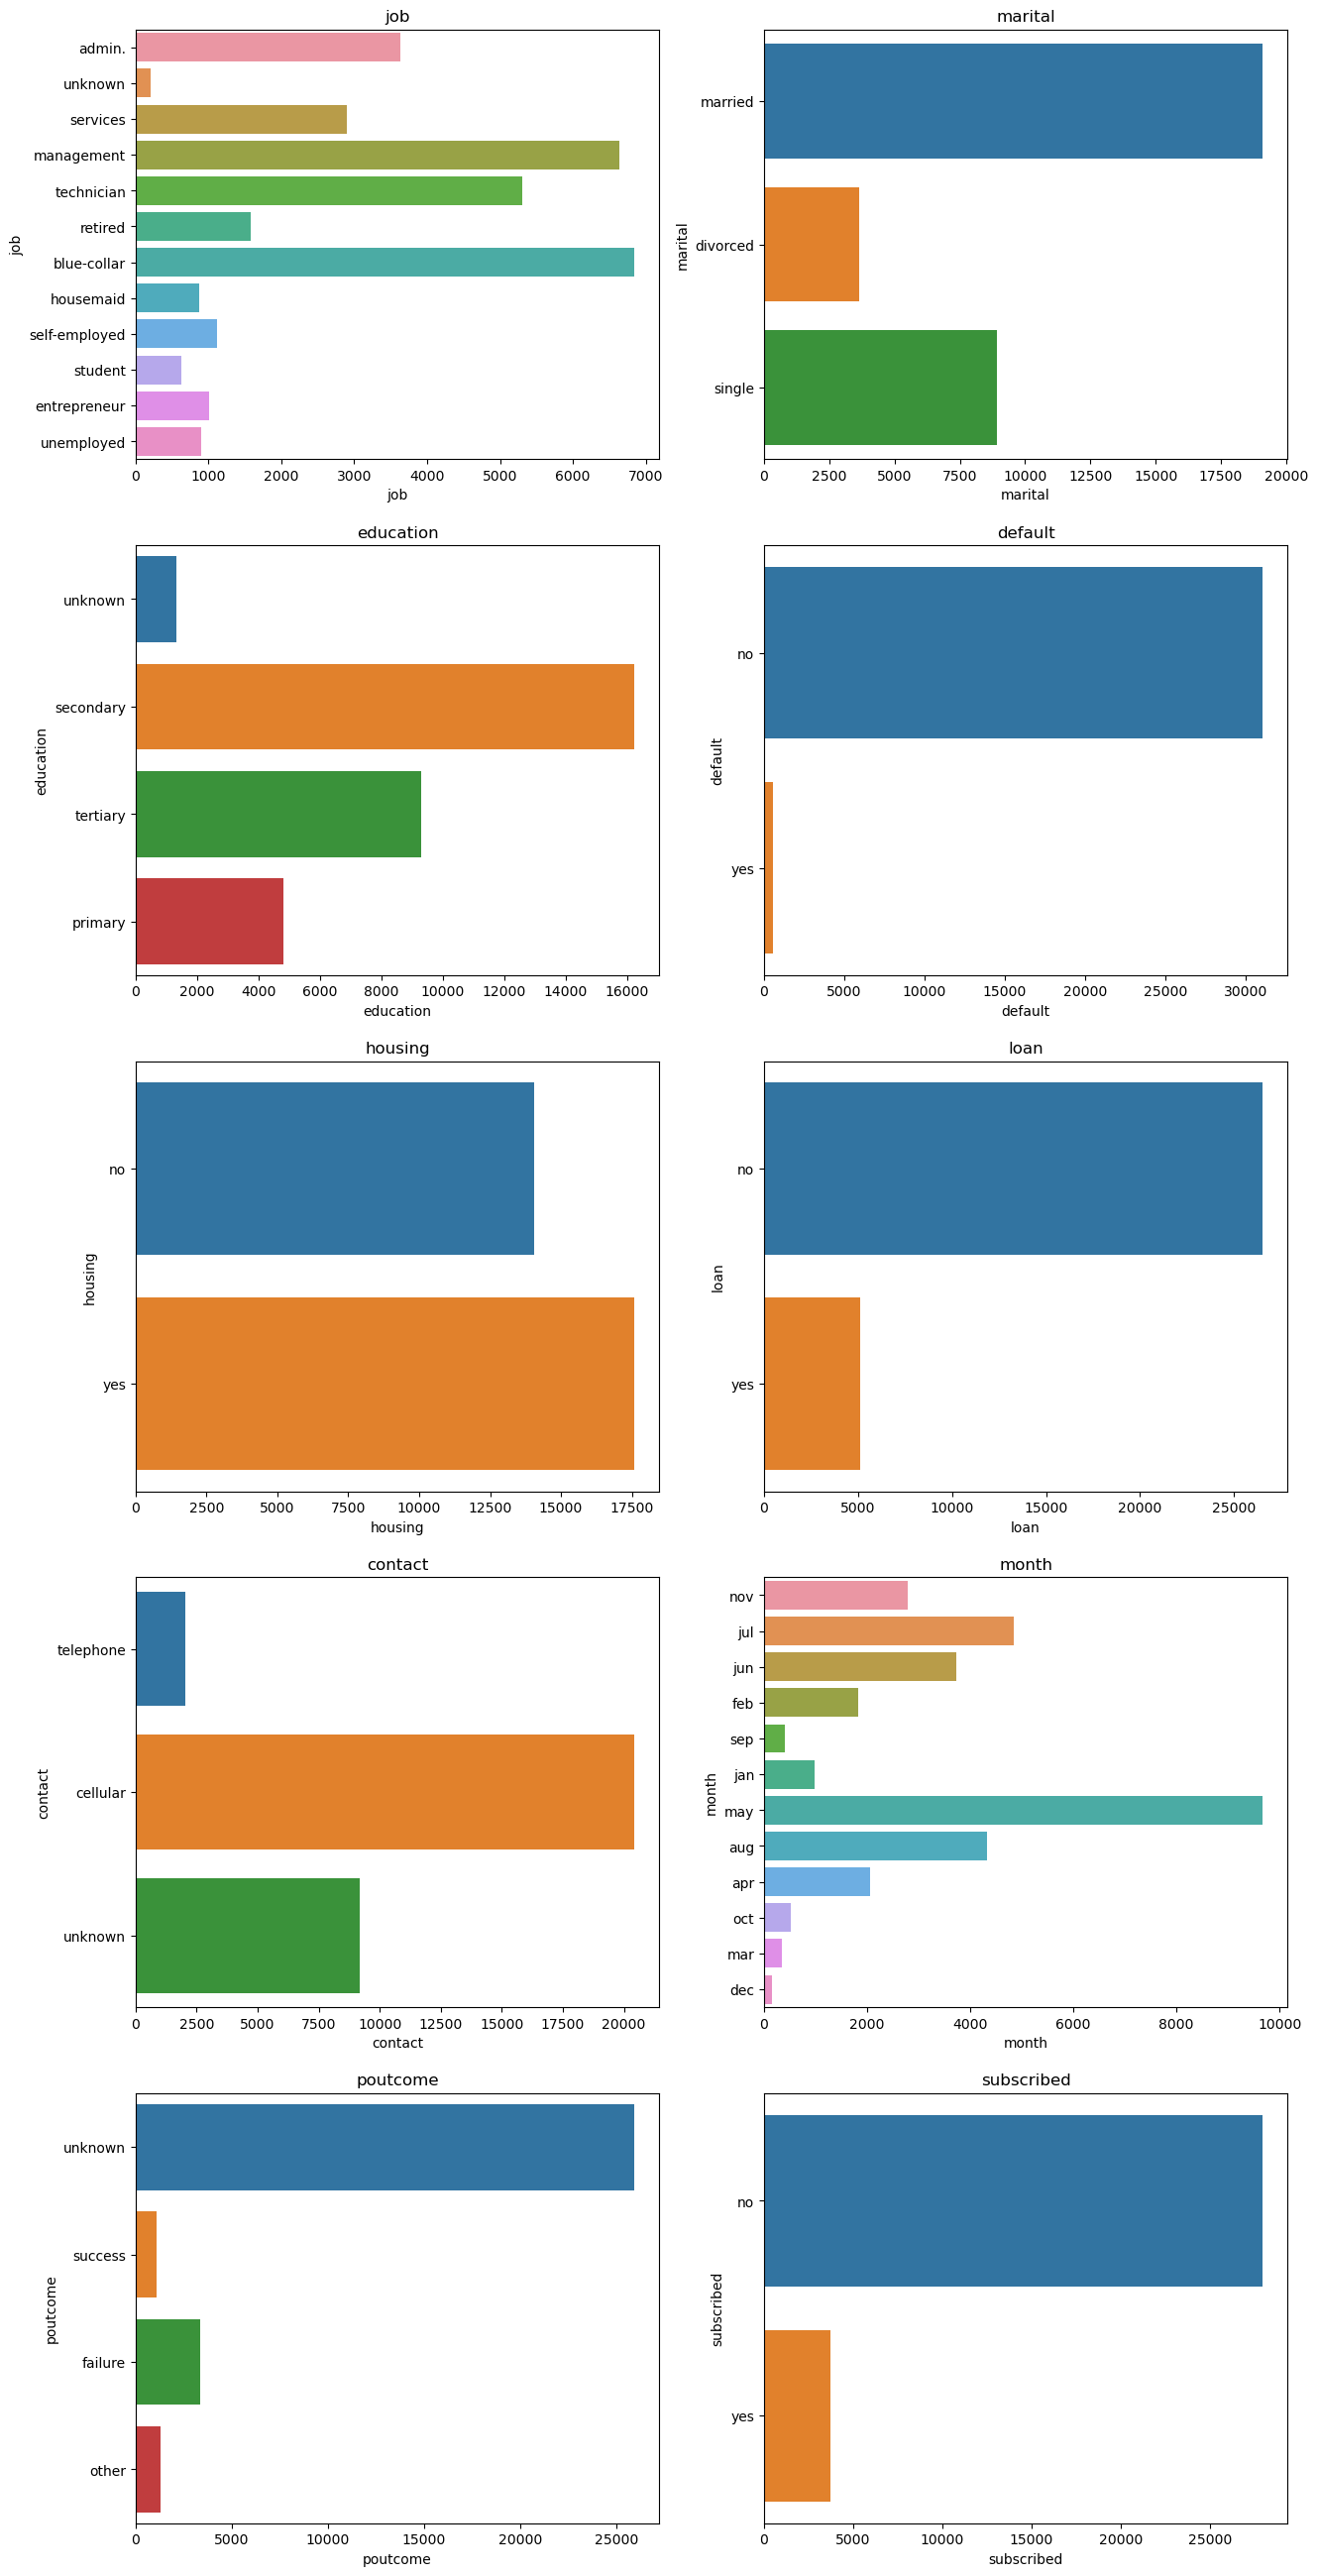

In [12]:
plt.figure(figsize=(15,80))
plotnumber=1
for categories in categorical_col:
    ax= plt.subplot(12,2,plotnumber)
    sns.countplot(y=categories,data=df)
    plt.xlabel(categories)
    plt.title(categories)
    plotnumber+=1
plt.show()

In [13]:
#encoding categorical columns of train data
from sklearn.preprocessing import OrdinalEncoder

In [14]:
encoder= OrdinalEncoder()

In [15]:
df[categorical_col]= encoder.fit_transform(df[categorical_col])

In [16]:
print("\nTransformed DataFrame:")
print(df)


Transformed DataFrame:
          ID  age   job  marital  education  default  balance  housing  loan  \
0      26110   56   0.0      1.0        3.0      0.0     1933      0.0   0.0   
1      40576   31  11.0      1.0        1.0      0.0        3      0.0   0.0   
2      15320   27   7.0      1.0        1.0      0.0      891      1.0   0.0   
3      43962   57   4.0      0.0        2.0      0.0     3287      0.0   0.0   
4      29842   31   9.0      1.0        1.0      0.0      119      1.0   0.0   
...      ...  ...   ...      ...        ...      ...      ...      ...   ...   
31642  36483   29   4.0      2.0        2.0      0.0        0      1.0   0.0   
31643  40178   53   4.0      0.0        2.0      0.0      380      0.0   1.0   
31644  19710   32   4.0      2.0        2.0      0.0      312      0.0   0.0   
31645  38556   57   9.0      1.0        1.0      0.0      225      1.0   0.0   
31646  14156   55   4.0      0.0        1.0      0.0      204      1.0   0.0   

       contact 

In [17]:
#separating target column and columns not necessary in the analysis from data
X_train= df.drop(['ID','subscribed'],axis=1)
Y_train= df['subscribed']

In [18]:
print(X_train)
print(Y_train)

       age   job  marital  education  default  balance  housing  loan  \
0       56   0.0      1.0        3.0      0.0     1933      0.0   0.0   
1       31  11.0      1.0        1.0      0.0        3      0.0   0.0   
2       27   7.0      1.0        1.0      0.0      891      1.0   0.0   
3       57   4.0      0.0        2.0      0.0     3287      0.0   0.0   
4       31   9.0      1.0        1.0      0.0      119      1.0   0.0   
...    ...   ...      ...        ...      ...      ...      ...   ...   
31642   29   4.0      2.0        2.0      0.0        0      1.0   0.0   
31643   53   4.0      0.0        2.0      0.0      380      0.0   1.0   
31644   32   4.0      2.0        2.0      0.0      312      0.0   0.0   
31645   57   9.0      1.0        1.0      0.0      225      1.0   0.0   
31646   55   4.0      0.0        1.0      0.0      204      1.0   0.0   

       contact  day  month  duration  campaign  pdays  previous  poutcome  
0          1.0   19    9.0        44         2 

# Working on testing data

In [19]:
df1= pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_test.csv')
df1

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [20]:
#separating numerical and categorical columns
numerical_col1=[]
categorical_col1=[]
for i in df1.dtypes.index:
    if df1.dtypes[i]=='object':
        categorical_col1.append(i)
    else:
        numerical_col1.append(i)

In [21]:
print('categorical column:',categorical_col1)
print('numerical column:',numerical_col1)

categorical column: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
numerical column: ['ID', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [22]:
#encoding categorical columns of train data
from sklearn.preprocessing import OrdinalEncoder
encoder= OrdinalEncoder()
df1[categorical_col1]= encoder.fit_transform(df1[categorical_col1])
print("\nTransformed DataFrame:")
print(df1)


Transformed DataFrame:
          ID  age  job  marital  education  default  balance  housing  loan  \
0      38441   32  7.0      1.0        1.0      0.0      118      1.0   0.0   
1      40403   78  5.0      0.0        0.0      0.0     2787      0.0   0.0   
2       3709   31  6.0      2.0        2.0      0.0      144      1.0   0.0   
3      37422   57  7.0      2.0        0.0      0.0     3777      1.0   0.0   
4      12527   45  1.0      0.0        1.0      0.0     -705      0.0   1.0   
...      ...  ...  ...      ...        ...      ...      ...      ...   ...   
13559  23465   39  4.0      1.0        2.0      0.0       45      0.0   0.0   
13560  11743   54  1.0      1.0        0.0      0.0     2281      1.0   0.0   
13561  28292   35  5.0      1.0        0.0      0.0      285      1.0   0.0   
13562  45163   29  0.0      2.0        1.0      0.0      464      0.0   0.0   
13563  34839   29  0.0      1.0        1.0      0.0        2      1.0   0.0   

       contact  day  month 

In [23]:
df1= df1.drop(columns='ID',axis=1)
print(df1)

       age  job  marital  education  default  balance  housing  loan  contact  \
0       32  7.0      1.0        1.0      0.0      118      1.0   0.0      0.0   
1       78  5.0      0.0        0.0      0.0     2787      0.0   0.0      1.0   
2       31  6.0      2.0        2.0      0.0      144      1.0   0.0      2.0   
3       57  7.0      2.0        0.0      0.0     3777      1.0   0.0      1.0   
4       45  1.0      0.0        1.0      0.0     -705      0.0   1.0      2.0   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
13559   39  4.0      1.0        2.0      0.0       45      0.0   0.0      0.0   
13560   54  1.0      1.0        0.0      0.0     2281      1.0   0.0      2.0   
13561   35  5.0      1.0        0.0      0.0      285      1.0   0.0      0.0   
13562   29  0.0      2.0        1.0      0.0      464      0.0   0.0      0.0   
13563   29  0.0      1.0        1.0      0.0        2      1.0   0.0      0.0   

       day  month  duration

# Creating model

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [25]:
model= RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

In [26]:
X_train_prediction= model.predict(X_train)
train_data_accuracy= accuracy_score(X_train_prediction, Y_train)
print('Accuracy:',train_data_accuracy)

Accuracy: 1.0


# Prediction on testing data

In [27]:
input_data= (df1)
data= np.asarray(input_data)
reshape= data.reshape(13564,16)

In [28]:
output= model.predict(reshape)
print(output)

[0. 0. 0. ... 0. 1. 0.]


In [32]:
if(output[0]==1):
    print('Subscribed')
else:
    print('Not subscribed')

Not subscribed
